## Solving the "banknote authentication" problem

0-th iteration with the best fitness = 0.25663719699732235
50-th iteration with the best fitness = 0.037539720982021144
100-th iteration with the best fitness = 0.03448010213568227
150-th iteration with the best fitness = 0.014790199500397148
200-th iteration with the best fitness = 0.006987379094155202
250-th iteration with the best fitness = 0.006987379094155202
300-th iteration with the best fitness = 0.004077965147253903
350-th iteration with the best fitness = 0.004077965147253903
400-th iteration with the best fitness = 0.004077965147253903
450-th iteration with the best fitness = 0.0025413367457479317
confusion_matrix: 
 [[234   0]
 [  1 177]]
f1_score: 
 0.9975254512147512


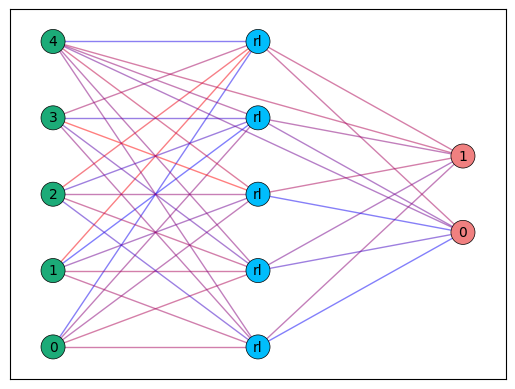

In [1]:
import numpy as np

from thefittest.optimizers import SHADE
from thefittest.benchmarks import BanknoteDataset
from thefittest.classifiers import MLPEAClassifier
from thefittest.tools.print import print_net

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

data = BanknoteDataset()
X = data.get_X()
y = data.get_y()

X_scaled = minmax_scale(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)

model = MLPEAClassifier(iters=500,
                        pop_size=250,
                        hidden_layers=(5,),
                        activation="relu",
                        weights_optimizer=SHADE,
                        weights_optimizer_args={"show_progress_each": 50})

model.fit(X_train, y_train)

predict = model.predict(X_test)
net = model.get_net()

print("confusion_matrix: \n", confusion_matrix(y_test, predict))
print("f1_score: \n", f1_score(y_test, predict, average="macro"))

print_net(net = net) # the "4" node is offset

## modeling of the "sin" function

0-th iteration with the best fitness = 0.35152437500877104
50-th iteration with the best fitness = 0.25229995142796363
100-th iteration with the best fitness = 0.16530039657633208
150-th iteration with the best fitness = 0.16529881660388412
200-th iteration with the best fitness = 0.11499222331094652
250-th iteration with the best fitness = 0.04200295102392625
300-th iteration with the best fitness = 0.039305542390270384
350-th iteration with the best fitness = 0.03842374667188699
400-th iteration with the best fitness = 0.03777892799647002
450-th iteration with the best fitness = 0.03722907994933118
coefficient_determination: 
 0.9869491690213806


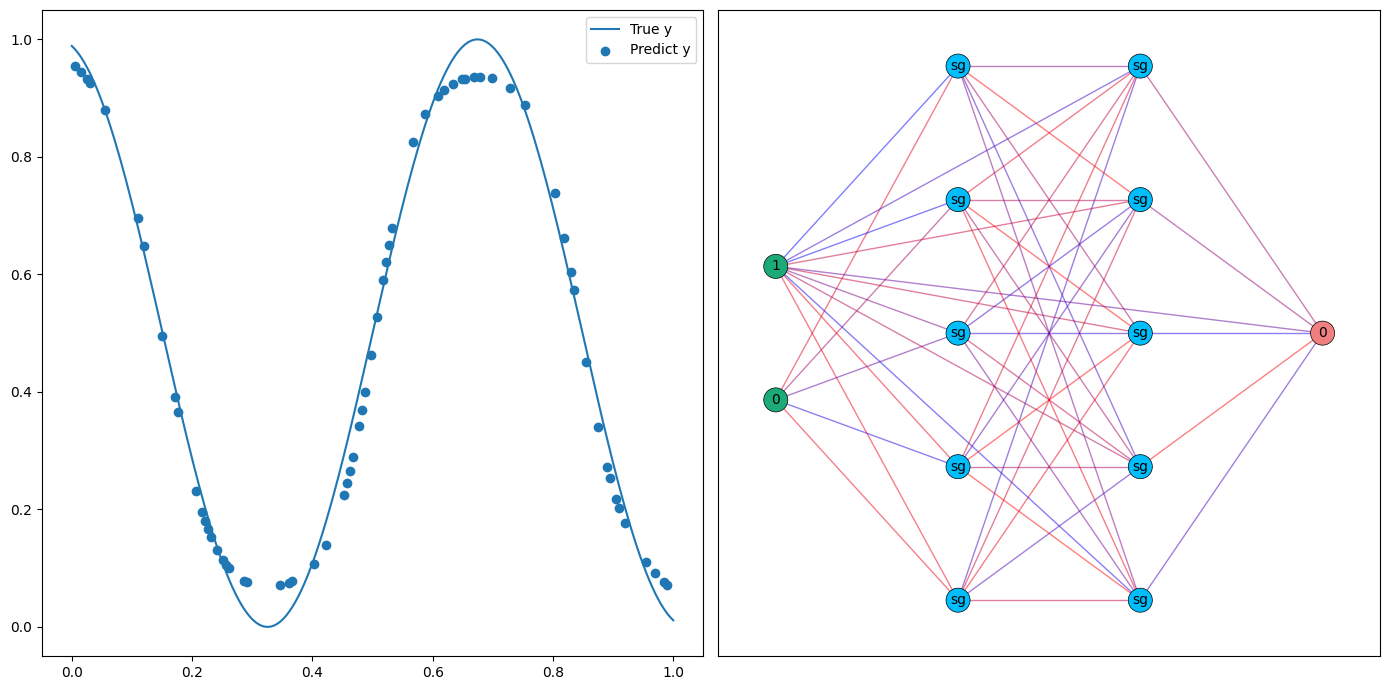

In [2]:
import matplotlib.pyplot as plt

from thefittest.regressors import MLPEARegressor
from thefittest.optimizers import SHAGA

from sklearn.metrics import r2_score

def problem(x):
    return np.sin(x[:,0])


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 200
n_dimension = 1

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = function(X)

X_scaled = minmax_scale(X)
y_scaled = minmax_scale(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.33)

model = MLPEARegressor(iters=500,
                       pop_size=250,
                       hidden_layers=(5, 5),
                       activation="sigma",
                       weights_optimizer=SHAGA,
                       weights_optimizer_args={"show_progress_each": 50})

model.fit(X_train, y_train)

predict = model.predict(X_test)
net = model.get_net()

print("coefficient_determination: \n", r2_score(y_test, predict))

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X_scaled[:,0], y_scaled, label = "True y")
ax[0].scatter(X_test[:,0], predict, label = "Predict y")
ax[0].legend()

print_net(net = net, ax = ax[1]) 

plt.tight_layout()
plt.show()
